In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd

In [21]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [23]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
#Use SQL Alchemy "automap" to...

Base = automap_base()

In [25]:
#..refelct tables into classes

Base.prepare(engine, reflect=True)

In [26]:
Base.classes.keys()

['measurement', 'station']

In [27]:
#and save references for both classes:
#Class 1:

Station = Base.classes.station


In [28]:
#Class 2:
Measurement = Base.classes.measurement

In [29]:
# reflect an existing database into a new model
# reflect the tables

session = Session(engine)


In [30]:
# We can view all of the classes that automap found
#viewing classes of Station:

station_classes = session.query(Station).first()
station_classes.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb5eb347220>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'longitude': -157.8168}

In [31]:
#viewing classes of Measurement
measurement_classes = session.query(Measurement).first()
measurement_classes.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb5eb347910>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [32]:
# Save references to each table (see above)


In [33]:
# Create our session (link) from Python to the DB (see below)


# Exploratory Climate Analysis

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#precipitation_last_twelve = session.query(Measurement).filter(prcp )

#find out the latest date in db first:

session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

session.query(Measurement.prcp, Measurement.date).filter(Measurement.date > '2016-08-23').all()

[(0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-10-06'),
 (0.0, '2016-1

In [36]:
# Calculate the date 1 year ago from the last data point in the database
#define last data point and print

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)



2016-08-23


In [37]:
#for climate app, final route, determine the range of dates in the database:

first_data_point = session.query(Measurement.date).order_by(Measurement.date.asc()).first()
last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f"the database ranges from: {first_data_point} to {last_data_point}")


the database ranges from: ('2010-01-01',) to ('2017-08-23',)


In [53]:
# Perform a query to retrieve the data and precipitation scores

prec_dates = session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date >= year_ago).all()

prec_dates


[(0.0, '2016-08-23'),
 (0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-1

In [44]:

# Save the query results as a Pandas DataFrame and set the index to the date column

dataframe = pd.DataFrame(prec_dates, columns=['prcp','date'])
dataframe.head()

prcp        date
0  0.00  2016-08-23
1  0.08  2016-08-24
2  0.08  2016-08-25
3  0.00  2016-08-26
4  0.00  2016-08-27

In [47]:
# Sort the dataframe by date

dataframe = dataframe.sort_values("date")

dataframe.set_index('date', inplace=True)



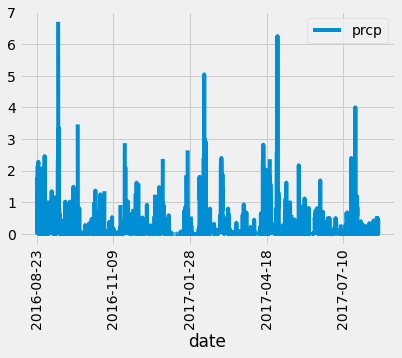

In [49]:
# Use Pandas Plotting with Matplotlib to plot the data
dataframe.plot(rot=90)

In [50]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dataframe.describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [55]:
# Design a query to show how many stations are available in this dataset?
station_total = session.query(func.count(Station.station)).all()
station_total


[(9)]

In [61]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
                                
active_stations

                            


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temperatures = session.query(Measurement.station, func.min(Measurement.tobs), 
func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

temperatures


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [71]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and 
#plot the results as a histogram
highest_temperature = session.query(Measurement.tobs).\
filter(Measurement.date >= year_ago).filter(Measurement.station == 'USC00519281').all()

Temp_dataframe = pd.DataFrame(highest_temperature, columns=['tobs'])

Temp_dataframe


tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]

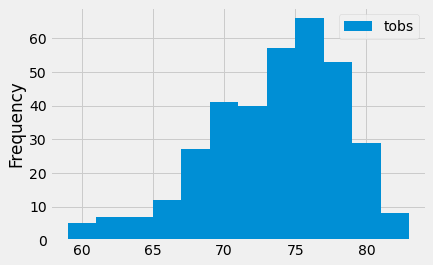

In [74]:
Temp_dataframe.plot.hist(bins=12)

In [44]:
#Sample query for Climate App - List of Station

station_list = session.query(Station.station).all()
station_list


[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
